In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy as sp
import warnings
import matplotlib 

import warnings


В датасете всего 18 колонок, которые содержат следующие данные:

Status: показывает, успешно ли обработаны машинные данные.

Device ID: уникальный электронный идентификатор (также называемый ePort) для торгового автомата.

Location : указывает местонахождение торгового автомата.

Machine : имя машины

Product : Продукт 

Category : Газированная / Еда / Негазированная / Вода

Transaction: уникальный идентификатор для каждой транзакции.

TransDate : Дата и время транзакции

Type : Тип сделки ( Наличные / Кредит )

RCoil : № катушки, используемой для продажи продукта.

RPrice : Цена продукта

RQty: проданное количество. Обычно это один, но машины можно настроить для продажи большего количества товаров за одну транзакцию.

MCoil : сопоставленная катушка №, используемая для продажи продукта (от toucan)

MPrice : сопоставленная цена продукта.

MQty : Сопоставленное количество проданных товаров. Обычно это один, но машины можно настроить для продажи большего количества товаров за одну транзакцию.

LineTotal: общая сумма продаж за транзакцию.

TransTotal: представляет общую сумму всех транзакций, которые будут отображаться на кредитной карте. 

Prcd Date: дата, когда транзакция была обработана SeedLive (объект, который используется для агрегирования всех транзакций в электронном виде).


In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Установка стилей для графиков seaborn
sn.set(style ="whitegrid", rc={'figure.figsize':(19, 7), 'axes.titlesize':16, 'axes.labelsize':14, 'xtick.labelsize':18, 
            'ytick.labelsize':18, 'axes.titlepad': 30, 'font.size':18})

Загрузим датасет и посмотрим на сами данные

In [5]:
df = pd.read_csv('vending_machine_sales.csv', parse_dates=['Prcd Date'])

In [6]:
df


,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date
0,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14515778905,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,2022-01-01
1,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516018629,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,5.0,2022-01-01
2,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516018629,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,5.0,2022-01-01
3,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Takis - Hot Chilli Pepper & Lime,Food,14516020373,"Saturday, January 1, 2022",Credit,123,1.5,1,123,1.5,1,1.5,1.5,2022-01-01
4,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Red Bull - Energy Drink - Sugar Free,Carbonated,14516021756,"Saturday, January 1, 2022",Credit,148,3.5,1,148,3.5,1,3.5,3.5,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6440,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Lindens - Chocolate Chippers,Food,15603201222,"Wednesday, August 31, 2022",Credit,122,2.0,1,122,2.0,1,2.0,6.0,2022-08-31
6441,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Wonderful Pistachios - Variety,Food,15603201222,"Wednesday, August 31, 2022",Credit,131,2.0,1,131,2.0,1,2.0,6.0,2022-08-31
6442,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Hungry Buddha - Chocolate Chip,Food,15603201222,"Wednesday, August 31, 2022",Credit,137,2.0,1,137,2.0,1,2.0,6.0,2022-08-31
6443,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Snapple Tea - Lemon,Non Carbonated,15603853105,"Wednesday, August 31, 2022",Credit,145,2.5,1,145,2.5,1,2.5,2.5,2022-08-31


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Status       6445 non-null   object        
 1   Device ID    6445 non-null   object        
 2   Location     6445 non-null   object        
 3   Machine      6445 non-null   object        
 4   Product      6441 non-null   object        
 5   Category     6260 non-null   object        
 6   Transaction  6445 non-null   int64         
 7   TransDate    6445 non-null   object        
 8   Type         6445 non-null   object        
 9   RCoil        6445 non-null   int64         
 10  RPrice       6445 non-null   float64       
 11  RQty         6445 non-null   int64         
 12  MCoil        6445 non-null   int64         
 13  MPrice       6444 non-null   float64       
 14  MQty         6445 non-null   int64         
 15  LineTotal    6445 non-null   float64       
 16  TransT

Описательная статистика для количественных данных

In [8]:
df.describe()

,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
count,6.445000e+03,6445.000000,6445.000000,6445.000000,6445.000000,6444.000000,6445.000000,6445.000000,6445.000000
mean,1.513391e+10,133.172692,1.926804,1.013344,133.172692,1.926870,1.013344,1.949651,2.183204
std,2.983541e+08,12.909228,0.673113,0.121324,12.909228,0.673145,0.121324,0.703080,1.044052
min,1.451578e+10,110.000000,1.000000,1.000000,110.000000,1.000000,1.000000,1.000000,1.000000
25%,1.490924e+10,122.000000,1.500000,1.000000,122.000000,1.500000,1.000000,1.500000,1.500000
50%,1.516775e+10,138.000000,1.500000,1.000000,138.000000,1.500000,1.000000,1.500000,2.000000
75%,1.538483e+10,144.000000,2.500000,1.000000,144.000000,2.500000,1.000000,2.500000,2.750000
max,1.560392e+10,165.000000,5.000000,3.000000,165.000000,5.000000,3.000000,8.000000,8.000000


В данных есть пропущенные значения, в столбце Product и Category, их количество не критично, заменим их нулями. Так же есть распарсенная колонка с датами, для удобства создадим еще две колонки - извлечем из даты месяц и день недели

In [9]:
df['month'] = df['Prcd Date'].dt.strftime('%B')

In [10]:
df['weekday'] = df['Prcd Date'].dt.day_name()

In [11]:
#Смотрим данные с пропущенными значениями 
df[df.Product.isnull()]

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,month,weekday
1232,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14835073327,"Wednesday, March 16, 2022",Credit,120,2.0,1,120,2.0,1,2.0,2.00,2022-03-30,March,Wednesday
1431,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14873793590,"Thursday, March 24, 2022",Cash,120,2.0,1,120,2.0,1,2.0,2.00,2022-03-30,March,Wednesday
1439,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14878665903,"Friday, March 25, 2022",Credit,120,2.0,1,120,2.0,1,2.0,3.25,2022-03-30,March,Wednesday
5500,Unlinked,VJ300320609,GuttenPlans,GuttenPlans x1367,NaN,NaN,15469028445,"Tuesday, August 2, 2022",Cash,133,1.5,1,133,NaN,1,1.5,1.50,2022-08-02,August,Tuesday


In [12]:
df[df.Category.isnull()]

,Status,Device ID,Location,Machine,Product,Category,Transaction,TransDate,Type,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal,Prcd Date,month,weekday
1232,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14835073327,"Wednesday, March 16, 2022",Credit,120,2.0,1,120,2.0,1,2.0,2.00,2022-03-30,March,Wednesday
1431,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14873793590,"Thursday, March 24, 2022",Cash,120,2.0,1,120,2.0,1,2.0,2.00,2022-03-30,March,Wednesday
1439,Processed,VJ300320692,EB Public Library,EB Public Library x1380,NaN,NaN,14878665903,"Friday, March 25, 2022",Credit,120,2.0,1,120,2.0,1,2.0,3.25,2022-03-30,March,Wednesday
1448,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,NaN,14879782611,"Friday, March 25, 2022",Cash,125,1.0,1,125,1.0,1,1.0,1.00,2022-03-25,March,Friday
1453,Processed,VJ300320609,GuttenPlans,GuttenPlans x1367,Doritos Dinamita Chile Lemon,NaN,14880181107,"Saturday, March 26, 2022",Cash,113,1.5,1,113,1.5,1,1.5,1.50,2022-03-25,March,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Mini Chips Ahoy - Go Paks,NaN,15586283593,"Saturday, August 27, 2022",Cash,154,4.0,1,154,4.0,1,4.0,4.00,2022-08-27,August,Saturday
6344,Processed,VJ300320611,Brunswick Sq Mall,BSQ Mall x1366 - ATT,Canada Dry - Ginger Ale & Lemonde,NaN,15589604424,"Sunday, August 28, 2022",Credit,140,1.5,1,140,1.5,1,1.5,1.50,2022-08-28,August,Sunday
6357,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,NaN,15592439137,"Monday, August 29, 2022",Cash,155,4.0,1,155,4.0,1,4.0,4.00,2022-08-29,August,Monday
6429,Processed,VJ300320692,EB Public Library,EB Public Library x1380,Oreo Mini - Go Paks,NaN,15599749782,"Tuesday, August 30, 2022",Cash,155,4.0,1,155,4.0,1,4.0,4.00,2022-08-30,August,Tuesday


In [13]:
df.Category = df.Category.fillna('0')

In [14]:
df.Product = df.Product.fillna('0')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6445 entries, 0 to 6444
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Status       6445 non-null   object        
 1   Device ID    6445 non-null   object        
 2   Location     6445 non-null   object        
 3   Machine      6445 non-null   object        
 4   Product      6445 non-null   object        
 5   Category     6445 non-null   object        
 6   Transaction  6445 non-null   int64         
 7   TransDate    6445 non-null   object        
 8   Type         6445 non-null   object        
 9   RCoil        6445 non-null   int64         
 10  RPrice       6445 non-null   float64       
 11  RQty         6445 non-null   int64         
 12  MCoil        6445 non-null   int64         
 13  MPrice       6444 non-null   float64       
 14  MQty         6445 non-null   int64         
 15  LineTotal    6445 non-null   float64       
 16  TransT

Пропуски обработали, подготовили данные к нужному формату, переходим непосредственно к разведочному анализу 

Посмотрим на топ-10 популярных товаров 

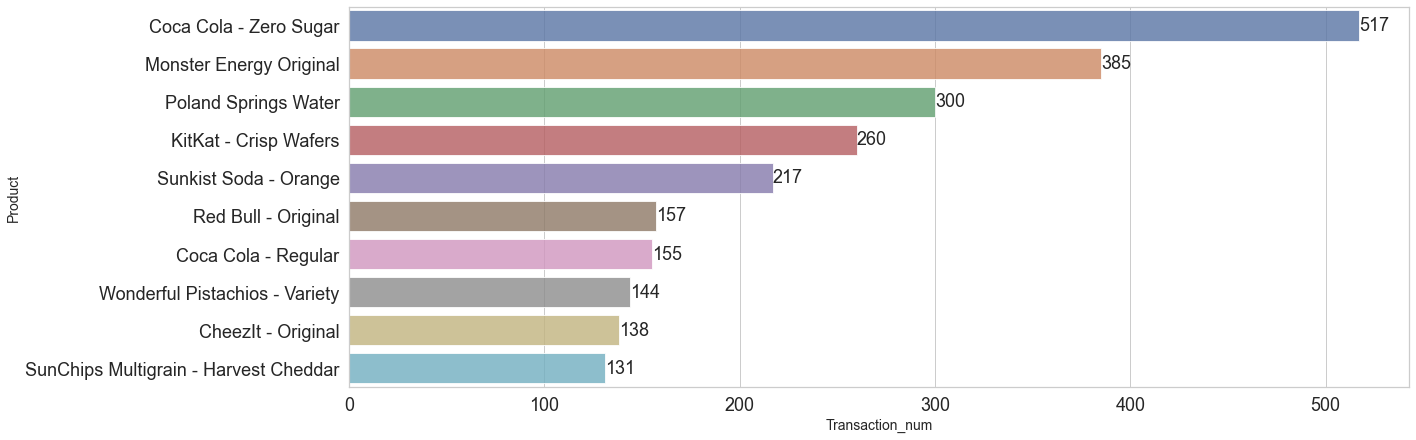

In [16]:
#группируем по продуктам и считаем количество каждого из них
product_num = df.groupby('Product').count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)
#Строим барплот 
sn.barplot(x='Transaction_num', y='Product', data=product_num.head(10), alpha = 0.8)
for a, b in enumerate(product_num.head(10).Transaction_num):
    plt.text(b, a, b, va='center')

Больше всего любят напиток Coca-Cola без сахара и энергетик Monster Energy

Топ-10 самых прибыльных товаров

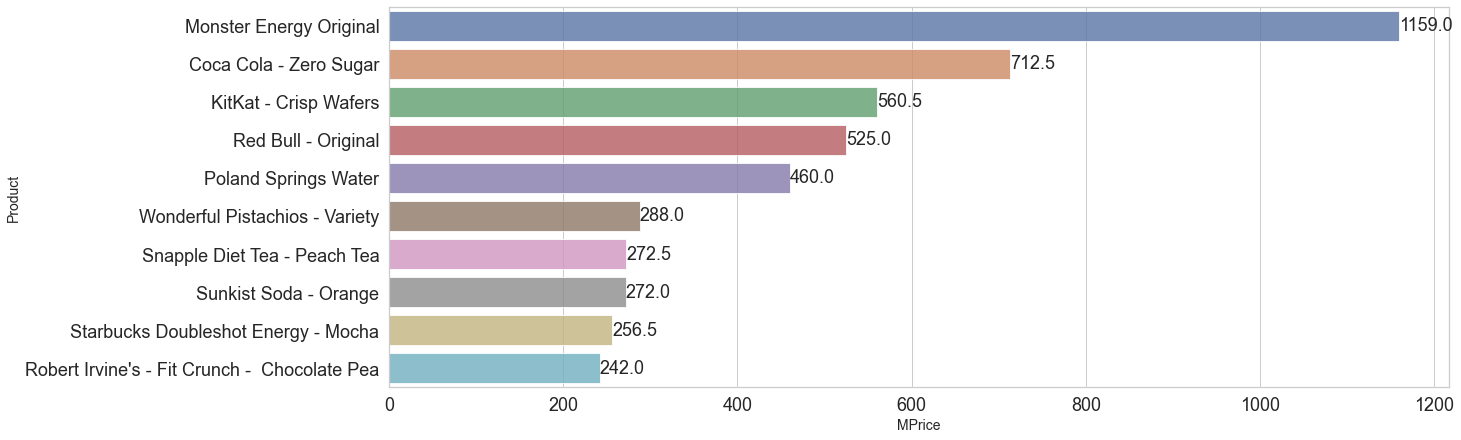

In [15]:
product_sale_num = df.groupby('Product').sum()['MPrice'].reset_index().sort_values('MPrice', ascending=False)

sn.barplot(x='MPrice', y='Product', data=product_sale_num.head(10), alpha = 0.8)

for a, b in enumerate(product_sale_num.head(10).MPrice):
    plt.text(b, a, b, va='center')

Больше всего прибыли принес энергетик Monster Energy Original

Прибыльность аппаратов

                   Machine   MPrice
4        GuttenPlans x1367  4839.25
2  EB Public Library x1380  3924.50
0   BSQ Mall x1364 - Zales  1308.75
3      Earle Asphalt x1371  1187.50
1     BSQ Mall x1366 - ATT  1156.75


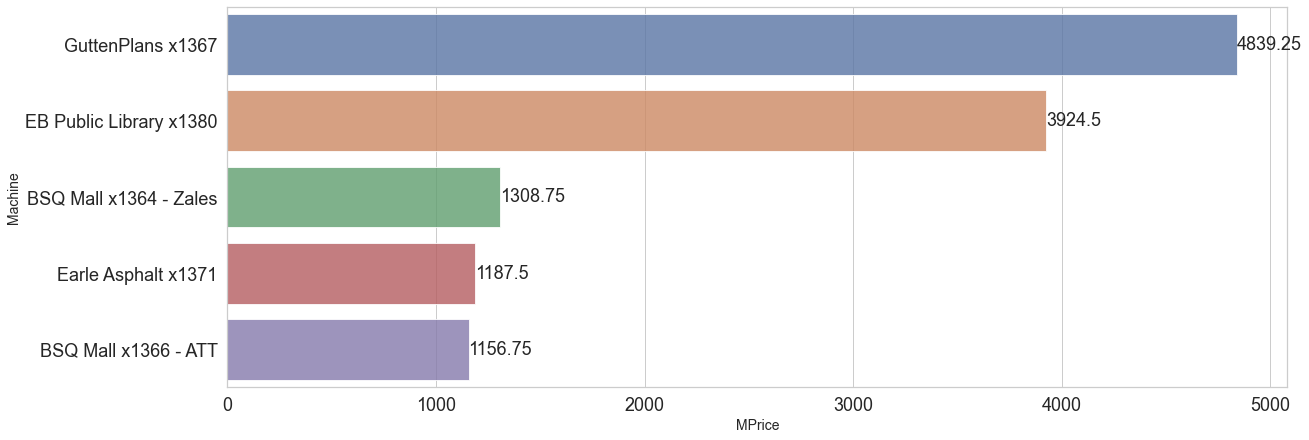

In [16]:
machine_sale_num = df.groupby('Machine').agg({'MPrice': 'sum'}).reset_index().sort_values('MPrice', ascending=False)
print(machine_sale_num)
sn.barplot(x='MPrice', y='Machine', data=machine_sale_num, alpha = 0.8)
for a, b in enumerate(machine_sale_num.MPrice):
    plt.text(b, a, b, va='center')

Самый прибыльный автомат - GuttenPlansx1367 - 4839.25 долларов. Он расположен на заводе GuttenPlans и принес за 8 месяцев в несколько раз больше прибыли (за исключением автомата из библиотеки), чем остальные автоматы 

Прибыльность в разрезе локации

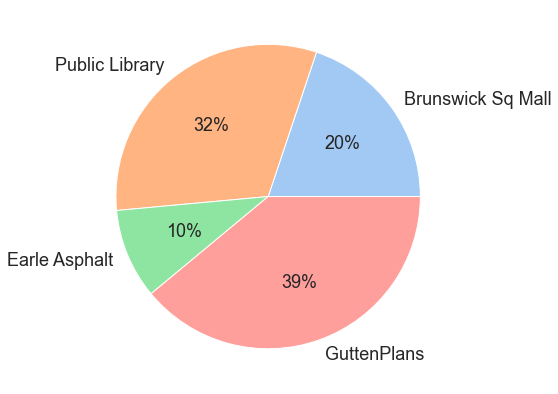

In [17]:
location_sale_num = df.groupby('Location').agg({'MPrice': 'sum'}).reset_index()

colors = sn.color_palette('pastel')[ 0:5 ]

plt.pie(location_sale_num.MPrice, 
        labels = ['Brunswick Sq Mall', 'Public Library', 'Earle Asphalt', 'GuttenPlans' ],
        colors = colors, autopct='%.0f%%')
plt.show()

Автомат на заводе GuttenPlans самый прибыльный - 39%, библиотека дает чуть меньше доходв - 32%, Торговый центр и офис еще меньше - 20% и 10%. Возможно на завод Guttenplans можно добавить еще один автомат, так как спрос большой. Нужно проанализировать остатки товаров на конец периода

Количество транзакций по машинам

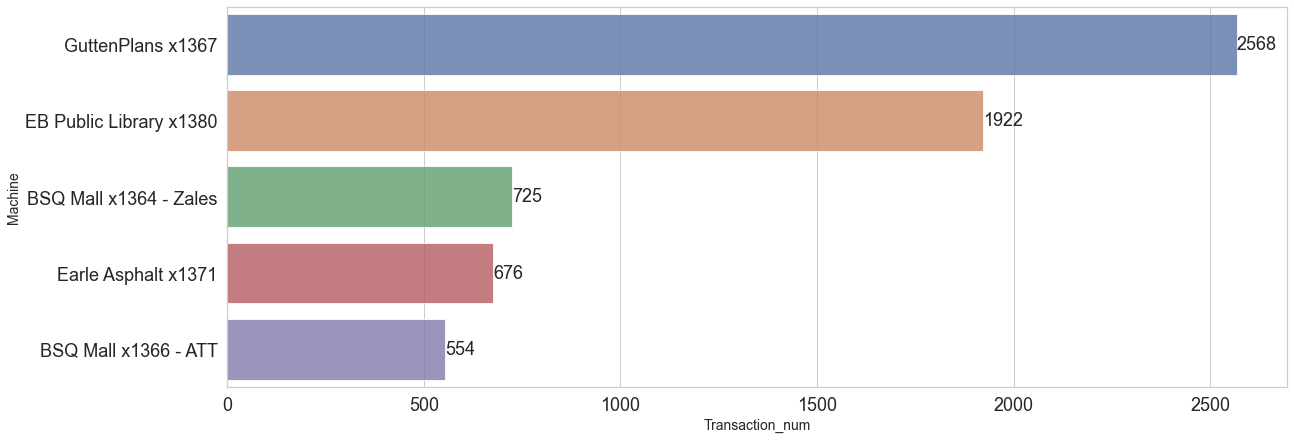

In [18]:
machine_trans_num = df.groupby('Machine').agg({'Transaction': 'count'}).reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)

sn.barplot(x='Transaction_num', y='Machine', data=machine_trans_num, alpha = 0.8)

for a, b in enumerate(machine_trans_num.Transaction_num):
    plt.text(b, a, b, va='center')

Количество транзакций по продуктам

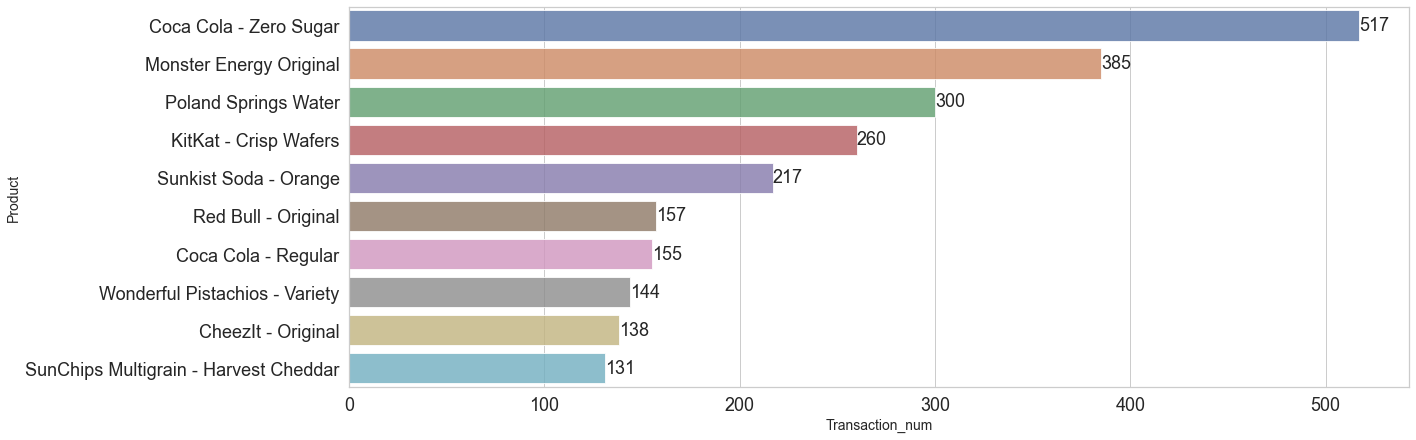

In [19]:
product_num = (
    df.groupby('Product')
    .count()['Transaction']
    .reset_index()
    .rename(columns={'Transaction': 'Transaction_num'})
    .sort_values('Transaction_num', ascending=False)
)

sn.barplot(x='Transaction_num', y='Product', data=product_num.head(10), alpha = 0.8)

for a, b in enumerate(product_num.head(10).Transaction_num):
    plt.text(b, a, b, va='center')

Как и ожидалось библиотека и завод лидируют с сильным разрывом, так как средняя стоимость продукта колеблется в районе 2 долларов, графики доходности и количество транзакции показывают одинаковое положение вещей (нет перевесов из-за большой цены на какой-то продукт, то есть за одну транзакцию платят примерно 1-2 доллара)

Какой тип оплаты в моде в 2022? Посмотрим на графики ниже

<AxesSubplot:xlabel='Type', ylabel='Count'>

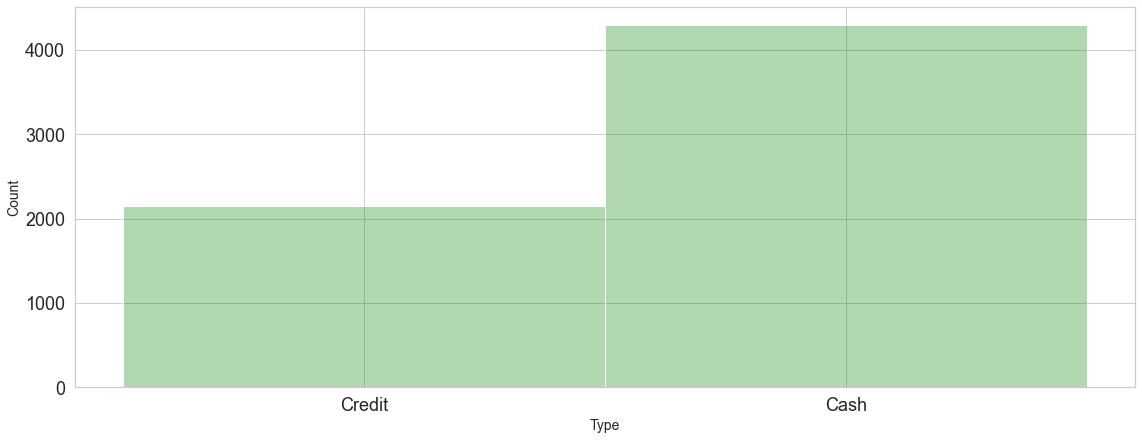

In [20]:
sn.histplot(df.Type, color='green', alpha=0.3)

Оплата наличными происходит в два раза чаще. Теперь уточним тип оплаты по локациям

<AxesSubplot:xlabel='Location', ylabel='MPrice'>

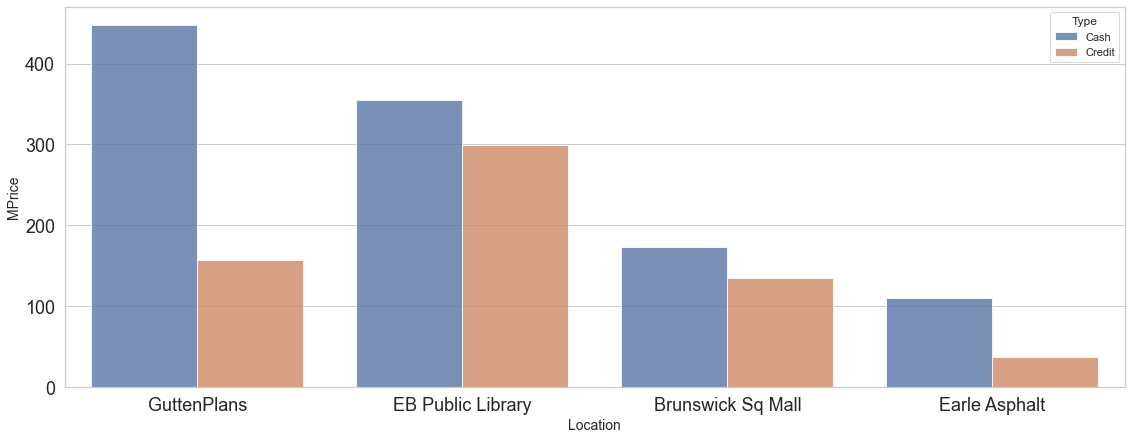

In [21]:
type_sum = df.groupby(['month', 'Location', 'Type']).agg({'MPrice': 'sum'}).reset_index().sort_values('MPrice', ascending=False)
sn.barplot(data = type_sum, x = 'Location', y='MPrice', hue='Type', ci=False, alpha = 0.8)


На заводе и в офисе наличными оплачивают чаще чем картой (более чем в два раза), в остальных локациях ситуация более сбалансированная, но наличные все равно имеют преимущество

Теперь узнаем какой тип снеков чаще всего покупают

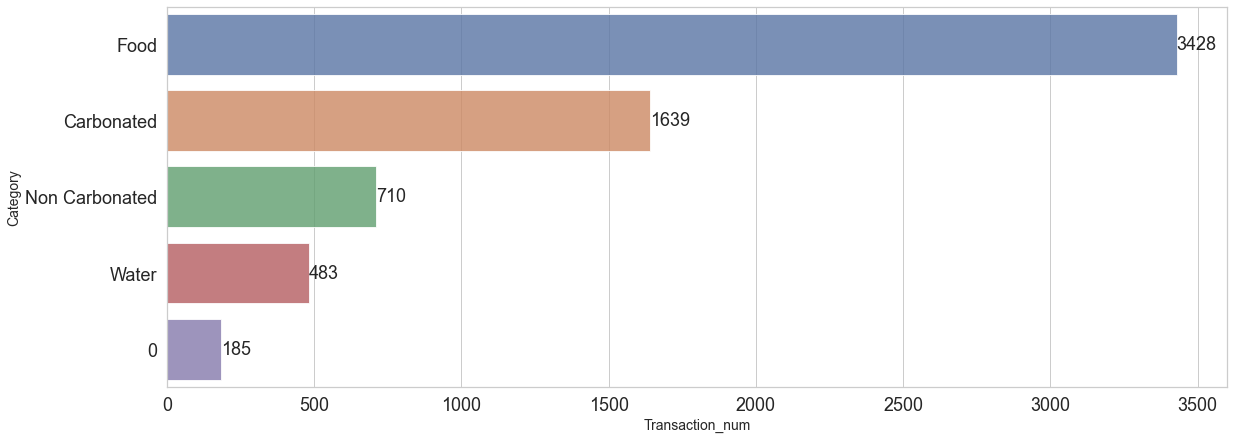

In [22]:
category_num = df.groupby('Category').count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)

sn.barplot(x='Transaction_num', y='Category', data=category_num, alpha = 0.8)

for a, b in enumerate(category_num.Transaction_num):
    plt.text(b, a, b, va='center')

Определенно категория "Еда" самая продаваемая. Почти в два раза больше по сравнению с газировкой и в 4-5 раз больше продаж, чем у воды без газа

Интересно взглянуть на доходность по месяцам

In [24]:
date_month = df.groupby(pd.Grouper(key='Prcd Date', freq='1M')).sum().reset_index()
date_month['Prcd Date'] = date_month['Prcd Date'].dt.strftime('%B %Y')

In [25]:
date_month

,Prcd Date,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,January 2022,7058869171458,63814,872.00,493,63814,872.00,493,887.00,954.25
1,February 2022,7216398421528,65340,887.00,502,65340,887.00,502,906.75,1048.50
2,March 2022,9409828876712,82851,1118.25,645,82851,1118.25,645,1135.50,1338.75
3,April 2022,12943019783711,115190,1611.00,870,115190,1611.00,870,1620.50,1788.25
4,May 2022,12908803434524,113888,1645.50,860,113888,1645.50,860,1655.50,1894.25
5,June 2022,15123039328183,132100,1986.00,1001,132100,1986.00,1001,2005.25,2157.75
6,July 2022,17376353509610,152116,2271.25,1147,152116,2271.25,1147,2300.25,2548.50
7,August 2022,15501747326540,132999,2027.25,1013,132999,2025.75,1013,2054.75,2340.50


Вглянем на доли по доходам

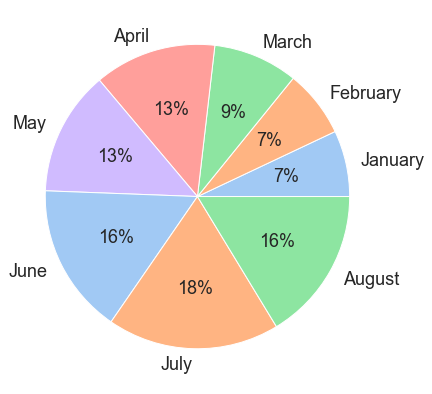

In [26]:
colors = sn.color_palette('pastel')[ 0:5 ]
plt.pie(date_month.MPrice, 
        labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August'],
        colors = colors, autopct='%.0f%%')
plt.show()

Продажи за 7 месяцев увеличились на 11 % 

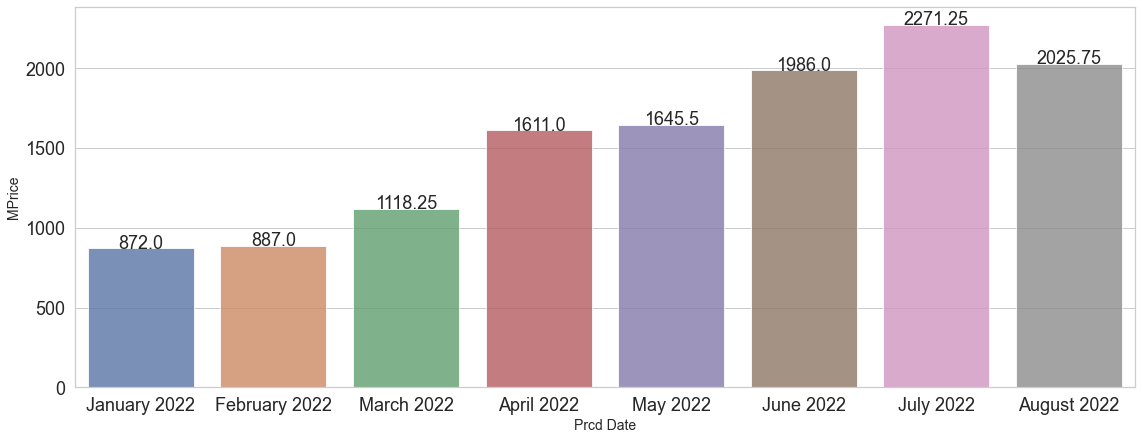

In [27]:
sn.barplot(data = date_month, x = 'Prcd Date', y='MPrice', alpha = 0.8)
for a, b in enumerate(date_month.MPrice):
    plt.text(a, b, b, ha='center')

Июль самый жаркий месяц ( и я не про температуру). Доход со всех машин составил 2271.25 долларов, это более чем в два раза больше, по сравнению с январем. Похоже, что продажи стабильно растут, проверим наличие тренда в продажах ниже

Построим барплот доходности по месяцам в разрезе машин

<AxesSubplot:xlabel='month', ylabel='MPrice'>

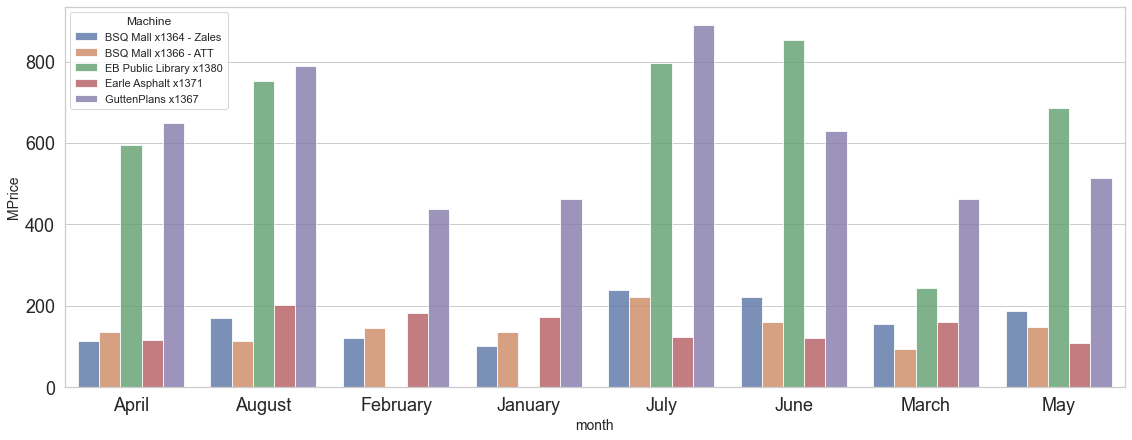

In [55]:
income_machine = df.groupby(['month', 'Machine']).agg({'MPrice':'sum'}).reset_index()

sn.barplot(x='month', y='MPrice', hue='Machine', data=income_machine, alpha = 0.8)


Самые доходные автоматы стоят на заводе GuttenPlans (по сравнению с январем, в июле резкий подъем покупок в два раза), так же  в публичной библиотеке наблюдается высокий доход и резкий скачок дохода в апреле. Посмотрим на доходность этих двух автоматов в процентах 

In [59]:
income_machine_month = df.groupby(['Machine', 'month']).agg({'MPrice': 'sum'})
income_machine_month

MPrice
Machine                 month           
BSQ Mall x1364 - Zales  April     112.50
                        August    169.00
                        February  120.50
                        January   101.50
                        July      239.25
                        June      222.25
                        March     156.50
                        May       187.25
BSQ Mall x1366 - ATT    April     136.25
                        August    113.25
                        February  146.25
                        January   135.25
                        July      222.50
                        June      160.75
                        March      93.75
                        May       148.75
EB Public Library x1380 April     595.25
                        August    752.25
                        July      795.75
                        June      851.75
                        March     244.25
                        May       685.25
Earle Asphalt x1371     April     117.00
                        August    201.75
                        February  181.25
                        January   173.00
                        July      123.75
                        June      120.75
                        March     160.25
                        May       109.75
GuttenPlans x1367       April     650.00
                        August    789.50
                        February  439.00
                        January   462.25
                        July      890.00
                        June      630.50
                        March     463.50
                        May       514.50

Завод GuttenPlans

In [65]:
income_machine.query('Machine == "GuttenPlans x1367"').MPrice

4     650.00
9     789.50
13    439.00
17    462.25
22    890.00
27    630.50
32    463.50
37    514.50
Name: MPrice, dtype: float64

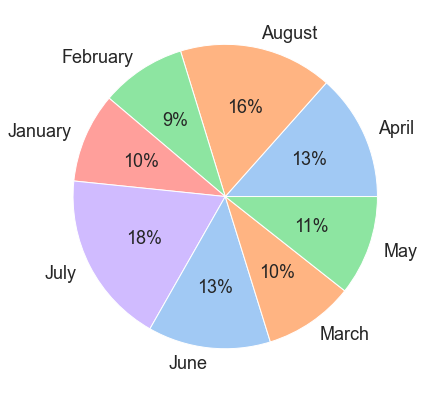

In [66]:
colors = sn.color_palette('pastel')[ 0:5 ]
plt.pie(income_machine.query('Machine == "GuttenPlans x1367"').MPrice, 
        labels = [ 'April', 'August', 'February', 'January', 'July', 'June', 'March', 'May'],
        colors = colors, autopct='%.0f%%')
plt.show()

Библиотека

In [68]:
income_machine.query('Machine == "EB Public Library x1380"').MPrice

2     595.25
7     752.25
20    795.75
25    851.75
30    244.25
35    685.25
Name: MPrice, dtype: float64

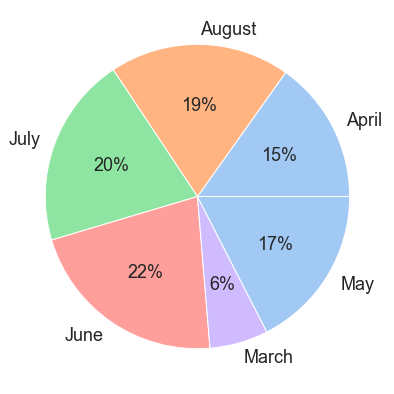

In [67]:
colors = sn.color_palette('pastel')[ 0:5 ]
plt.pie(income_machine.query('Machine == "EB Public Library x1380"').MPrice, 
        labels = [ 'April', 'August', 'July', 'June', 'March', 'May'],
        colors = colors, autopct='%.0f%%')
plt.show()

У автомата на заводе пик продаж приходится на июль - 18%, против 10% в январе. Июнь-июль повышенный спрос, но в августе незначительное снижение до 16% (возможно это летняя сезонность, но данных не хватает для проверки этой гипотезы). В библиотеке в январе, феврале не было дохода совсем, видимо автомат поставили только в марте, затем происходит резкий подъем прибыли и в летние месяцы доходит до пика, в августе тоже наблюдается незначительное снижение 

Посмотрим на временной ряд продаж

<AxesSubplot:xlabel='Prcd Date', ylabel='MPrice'>

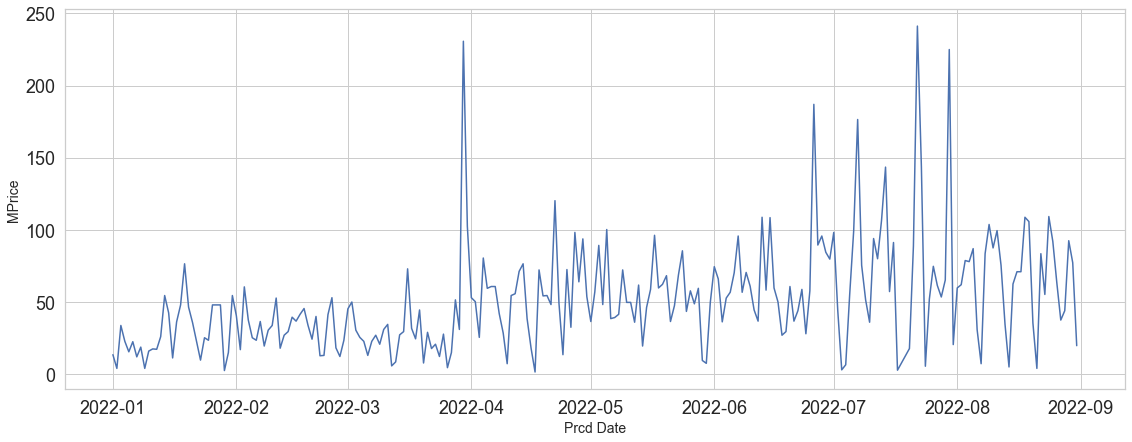

In [17]:
Daily_sale_num =  df.groupby('Prcd Date').agg({'MPrice': 'sum'})

sn.lineplot(y='MPrice', x='Prcd Date', data=Daily_sale_num)


Четко определить линию тренда мешает высокая вариабельность значений (есть недельная сезонность, скорее всего это связано с падением продаж по выходным). Однако видно что в начале года пики продаж достигали в среднем 50 долларов, а в апреле значения увеличиваются до 100. Так же дисперсия становится больше и имеет тенденцию к увеличению до конца временного ряда. Есть несколько аномальных значений в конце марта и в июле. Посмотрим поближе на эти значения ниже

In [18]:
Daily_sale_num

,MPrice
Prcd Date,
2022-01-01,13.50
2022-01-02,4.00
2022-01-03,33.75
2022-01-04,22.75
2022-01-05,15.50
...,...
2022-08-27,37.50
2022-08-28,44.00
2022-08-29,92.50


Для того, что бы увидить линию тренда, нам надо достаточно сгладить ряд. Для этого попробуем использовать скользящее среднее с окном 30

In [22]:
Rolling_sales = Daily_sale_num.rolling(window=30).mean()

<AxesSubplot:xlabel='Prcd Date'>

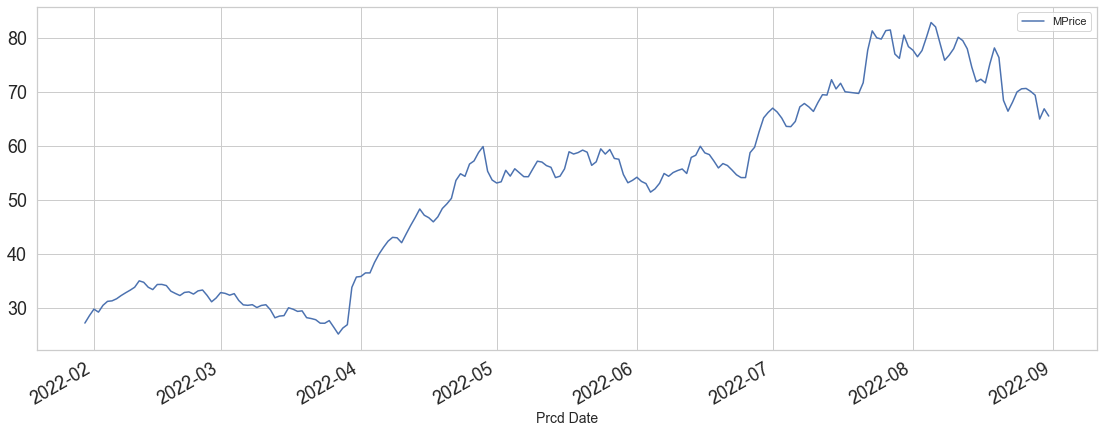

In [24]:
Rolling_sales.plot()

В приницпе, с таким размером окна уже достаточно хорошо видно, что есть два локальных тренда ( резкие подъемы в апреле и в июле, в основном это произошло за счет автоматов на заводе и библиотеке) и двухмесячные плато с января по февраль и ма-июль. Основной тренд определенно положительный, средние значения в конце ряда ~ 70 долларов, что больше в 2.5 раза значений на начало года 

Посчитаем стандартное отклонение и доверительные интервалы 99% , что бы понять какие значения можно считать аномалиями

In [23]:
dif = Daily_sale_num.MPrice - Rolling_sales.MPrice

# Найдем стандартное отклонение
std = np.std(dif)
round(std, 2)

34.32

In [26]:
# Рассчитаем доверительные интервалы
Daily_sale_num['upper_bound'] = Rolling_sales.MPrice + 2.576 * std
Daily_sale_num['lower_bound'] = Rolling_sales.MPrice - 2.576 * std

In [27]:
round(Daily_sale_num.tail(1).upper_bound, 2)

Prcd Date
2022-08-31    153.93
Name: upper_bound, dtype: float64

Выше границы интервала

In [28]:
Daily_sale_num[Daily_sale_num['MPrice'] > Daily_sale_num['upper_bound']]

,MPrice,upper_bound,lower_bound
Prcd Date,,,
2022-03-30,230.75,122.259335,-54.542668
2022-06-26,187.00,147.159335,-29.642668
2022-07-07,176.50,155.626001,-21.176001
2022-07-22,241.25,166.101001,-10.701001
2022-07-30,225.00,168.901001,-7.901001


Ниже нижней границы

In [30]:
Daily_sale_num[Daily_sale_num['MPrice'] < Daily_sale_num['lower_bound']]

,MPrice,upper_bound,lower_bound
Prcd Date,,,


У нас получилось 5 выбросов, Посмотрим на самые значительные отклонения > 200, начнем с марта

In [36]:
march_sale = df.query("month =='March'").groupby('Prcd Date', as_index=False).agg({'MPrice':'sum'})
march_sale

,Prcd Date,MPrice
0,2022-03-01,45.25
1,2022-03-02,50.00
2,2022-03-03,30.50
3,2022-03-04,25.50
4,2022-03-05,22.75
5,2022-03-06,13.00
6,2022-03-07,22.75
7,2022-03-08,27.00
8,2022-03-09,20.75
9,2022-03-10,31.00


Поймали, 30  марта продажи резко подскочили в несколько раз. Отфильтруем по этой дате и сгруппируем по автоматам, узнаем какая машина принесла столько продаж

In [37]:
df.set_index('Prcd Date', inplace=True)

In [82]:
df.loc['2022-03-30'].groupby('Machine', as_index=False).sum()

,Machine,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,BSQ Mall x1364 - Zales,29801953433,291,4.25,2,291,4.25,2,4.25,4.25
1,BSQ Mall x1366 - ATT,44699202754,440,9.50,3,440,9.50,3,9.50,9.50
2,EB Public Library x1380,1411220132798,12264,177.25,95,12264,177.25,95,177.25,186.75
3,Earle Asphalt x1371,74495357095,649,8.75,5,649,8.75,5,8.75,12.00
4,GuttenPlans x1367,268215978498,2391,31.00,18,2391,31.00,18,31.00,39.50


Автомат в библиотеке собрал 177 долларов, по сравнению с другими автоматами это очень много

Какой был день недели?

In [39]:
df.loc['2022-03-30']['weekday']

Prcd Date
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
                ...    
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
2022-03-30    Wednesday
Name: weekday, Length: 123, dtype: object

<AxesSubplot:>

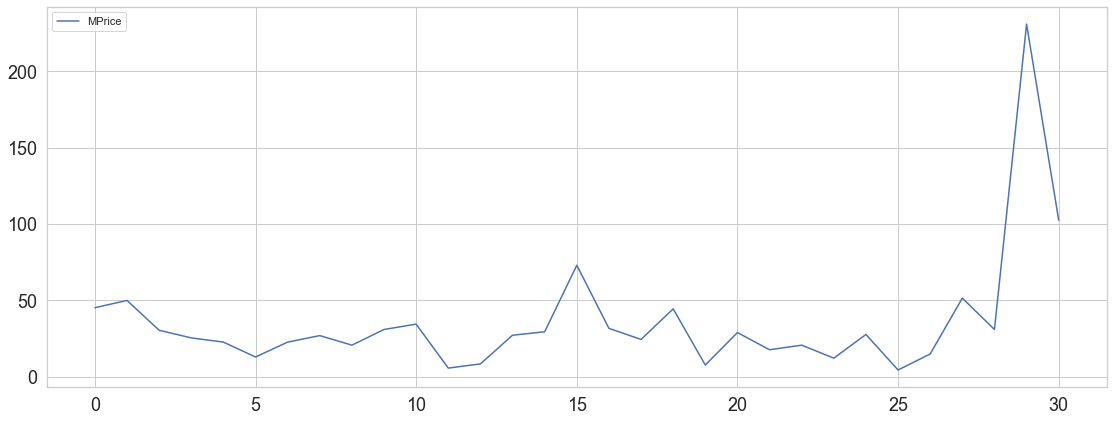

In [37]:
sn.lineplot(data=march_sale)

In [75]:
Library_march_sale = df.query("month =='March' & Machine == 'EB Public Library x1380'").groupby('Prcd Date').agg({'Transaction':'count'})
Library_march_sale

,Transaction
Prcd Date,
2022-03-14,1
2022-03-30,95
2022-03-31,35


<AxesSubplot:xlabel='Prcd Date', ylabel='Transaction'>

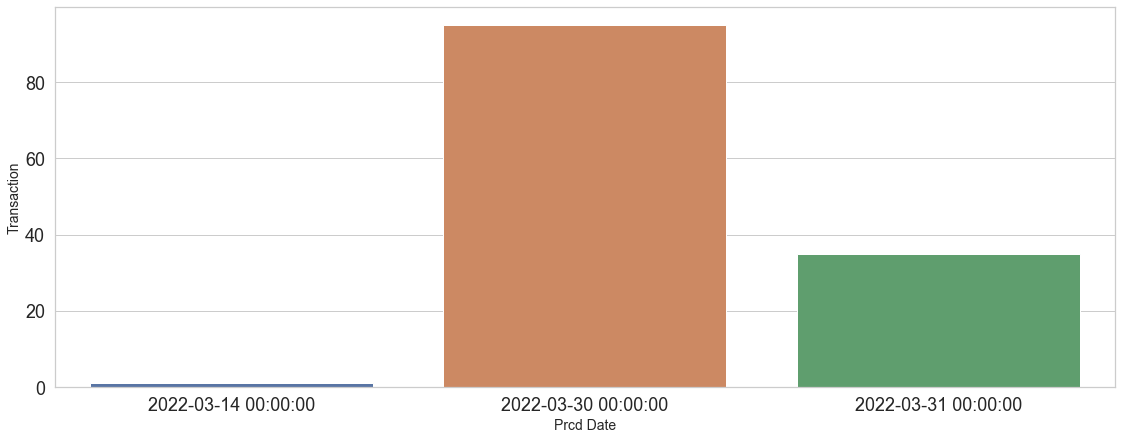

In [78]:
sn.barplot(x = Library_march_sale.index, y='Transaction', data=Library_march_sale)

Автомат заработал только 30 марта (до этого была одна покупка, похоже тестовая)

Посмотрим, какие снеки брали посетители библиотеки больше всего

In [80]:
df.loc['2022-03-30'].query('Location == "EB Public Library"').groupby(['Machine', 'Product']).agg({'Category': 'count'}).reset_index().sort_values('Category')

,Machine,Product,Category
19,EB Public Library x1380,Robert Irvine's - Fit Crunch - Chocolate Pea,1
18,EB Public Library x1380,Remedy Kombucha - Ginger Lemon,1
17,EB Public Library x1380,RXBAR - Protein Bar - Peanut Butter,1
16,EB Public Library x1380,RXBAR - Protein Bar - Chocolate Sea Salt,1
7,EB Public Library x1380,Hungry Buddha - Chocolate Chip,1
1,EB Public Library x1380,Autumns Granola Bar - Cinnamon Almond,2
20,EB Public Library x1380,Seapoint Farms Dry Roasted Edamame - Wasabi,2
0,EB Public Library x1380,0,3
10,EB Public Library x1380,Lenny & Larrys - SnickerDoodle,3
22,EB Public Library x1380,Starbucks Doubleshot Energy - Mocha,3


Чипсы Miss Vickie's Potato Chip - фаворит у посетителей 30 марта, Coca-Cola без сахара не отстает.

In [39]:
df[df['Product'].str.contains('Miss Vickie\'s Potato Chip')].query("Location == 'EB Public Library'").groupby('Prcd Date').count()['Product']

Prcd Date
2022-03-30    32
2022-03-31     1
2022-04-01     1
2022-04-02     1
2022-04-04     2
2022-04-06     1
2022-04-09     1
2022-04-11     1
2022-04-14     1
2022-06-13     2
2022-06-14     1
2022-06-17     1
2022-06-26     2
2022-06-28     1
2022-06-29     1
2022-07-01     1
2022-07-02     1
2022-07-05     3
2022-07-07     2
2022-07-11     1
2022-07-13     1
2022-07-30     1
2022-07-31     2
2022-08-01     1
2022-08-08     1
2022-08-09     2
2022-08-10     1
2022-08-16     3
2022-08-17     1
2022-08-18     2
2022-08-19     1
2022-08-22     1
2022-08-24     2
2022-08-25     5
Name: Product, dtype: int64

Видимо 30 марта, в среду, в библиотеке  автомат только подключили и провели какую-то рекламную акцию с продажей чипсов и колы

Посмотрим на аномалию в июле

In [40]:
july_sale = df.query("month =='July'").groupby('Prcd Date').agg({'MPrice':'sum'})
july_sale

,MPrice
Prcd Date,
2022-07-01,98.25
2022-07-02,44.25
2022-07-03,3.00
2022-07-04,6.50
2022-07-05,55.25
2022-07-06,99.25
2022-07-07,176.50
2022-07-08,75.50
2022-07-09,51.50


In [41]:
df.loc['2022-07-22'].groupby('Machine', as_index=False).sum()

,Machine,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,BSQ Mall x1364 - Zales,138675649847,1159,18.00,9,1159,18.00,9,18.00,18.00
1,BSQ Mall x1366 - ATT,30814043708,276,3.50,3,276,3.50,3,5.00,5.00
2,EB Public Library x1380,847447217932,7471,112.25,55,7471,112.25,55,112.25,117.25
3,Earle Asphalt x1371,92451986426,787,11.50,6,787,11.50,6,11.50,14.50
4,GuttenPlans x1367,693378188253,6024,96.00,45,6024,96.00,45,96.00,111.00


22 июля снова в библиотеке происходит какое-то событие, что приводит к чрезмерному потреблению снеков

In [42]:
df.loc['2022-07-22'].query('Location == "EB Public Library"').groupby(['Machine', 'Product']).agg({'Category': 'count'}).sort_values('Category')

Category
Machine                 Product                                                
EB Public Library x1380 Snyder's of Hanover Pretzel Pieces - Honey Mu         1
                        BodyArmor LYTE - Strawberry Lemonade                  1
                        Seapoint Farms Dry Roasted Edamame - Wasabi           1
                        CheezIt - White Cheddar                               1
                        Starbucks Refresher - Real Coconut Water              1
                        Robert Irvine's - Fit Crunch -  Chocolate Pea         1
                        Hungry Buddha - Chocolate Chip                        1
                        Pringles - Sour Cream & Onion                         1
                        Keep Healthy - Chocolate Fudge                        1
                        Pringles - Cheddar Cheese                             1
                        Oreo Mini - Go Paks                                   1
                        Pop Corners - White Cheddar                           1
                        Pop Corners - Sweet & Salty Kettle                    1
                        Popchips Potato - Sea Salt                            2
                        KitKat - Crisp Wafers                                 2
                        Starbucks Doubleshot Energy - Mocha                   2
                        Iberia Coconut Water                                  2
                        Goldfish Baked - Cheddar                              2
                        CheezIt - Original                                    2
                        SunChips Multigrain - Harvest Cheddar                 2
                        Snapple Diet Tea - Peach Tea                          3
                        BodyArmor  LYTE - Blueberry Pomegranate               4
                        Wonderful Pistachios - Variety                        4
                        Coca Cola - Zero Sugar                                5
                        Keto Bar - Creamy Peanut Butter Chocolate             5
                        Poland Springs Water                                  7

Однако в июле спрос сместился на весеннюю водичку из Польши ( видимо сказывается жара)

Посмотрим кто сорвал джек-пот 30 июля

In [43]:
df.loc['2022-07-30'].groupby('Machine', as_index=False).sum()

,Machine,Transaction,RCoil,RPrice,RQty,MCoil,MPrice,MQty,LineTotal,TransTotal
0,BSQ Mall x1364 - Zales,30910156666,287,4.75,2,287,4.75,2,4.75,4.75
1,BSQ Mall x1366 - ATT,30910894787,265,4.25,2,265,4.25,2,4.25,4.25
2,EB Public Library x1380,1573903776793,13837,210.00,104,13837,210.00,104,212.75,243.50
3,GuttenPlans x1367,30909278295,292,6.00,2,292,6.00,2,6.00,6.00


In [44]:
df.loc['2022-07-30'].query('Location == "EB Public Library"').groupby(['Machine', 'Product']).agg({'Category': 'count'}).sort_values('Category')

Category
Machine                 Product                                                
EB Public Library x1380 Teddy Grahams - Go Paks                               1
                        CheezIt - Go Paks                                     1
                        SunChips Multigrain - Harvest Cheddar                 1
                        Seapoint Farms Dry Roasted Edamame - Wasabi           1
                        Pringles - Sour Cream & Onion                         1
                        Hungry Buddha - Chocolate Chip                        1
                        Pringles - Cheddar Cheese                             1
                        V8 Vegetable Juice - Original                         1
                        Miss Vickie's Potato Chip - Sea Salt & Vinega         1
                        Mini Chips Ahoy - Go Paks                             1
                        BodyArmor  LYTE - Blueberry Pomegranate               2
                        Snyder's of Hanover Pretzel Pieces - Honey Mu         2
                        Oreo Mini - Go Paks                                   2
                        Keto Bar - Creamy Peanut Butter Chocolate             2
                        Lenny & Larrys - Chocolate Chip                       2
                        CheezIt - White Cheddar                               2
                        Wonderful Pistachios - Variety                        3
                        Starbucks Refresher - Real Coconut Water              3
                        Iberia Coconut Water                                  4
                        Robert Irvine's - Fit Crunch -  Chocolate Pea         4
                        Snapple Diet Tea - Peach Tea                          4
                        Starbucks Doubleshot Energy - Mocha                   4
                        BodyArmor LYTE - Strawberry Lemonade                  4
                        Pop Corners - Sweet & Salty Kettle                    5
                        CheezIt - Original                                    5
                        Goldfish Baked - Cheddar                              6
                        Pop Corners - White Cheddar                           7
                        S. Pellegrino Sparkling Mineral Water                 7
                        KitKat - Crisp Wafers                                 8
                        Coca Cola - Zero Sugar                               16

In [45]:
df.loc['2022-07-30']['weekday']

Prcd Date
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
                ...   
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
2022-07-30    Saturday
Name: weekday, Length: 108, dtype: object

И последняя аномальная встреча снова происходит в библиотеке, уже в субботу, что приводит к повышенному спросу на напиток Coca-Cola без сахара(возможно встреча ЗОЖников)

Посмотрим на объем спроса по дням недели

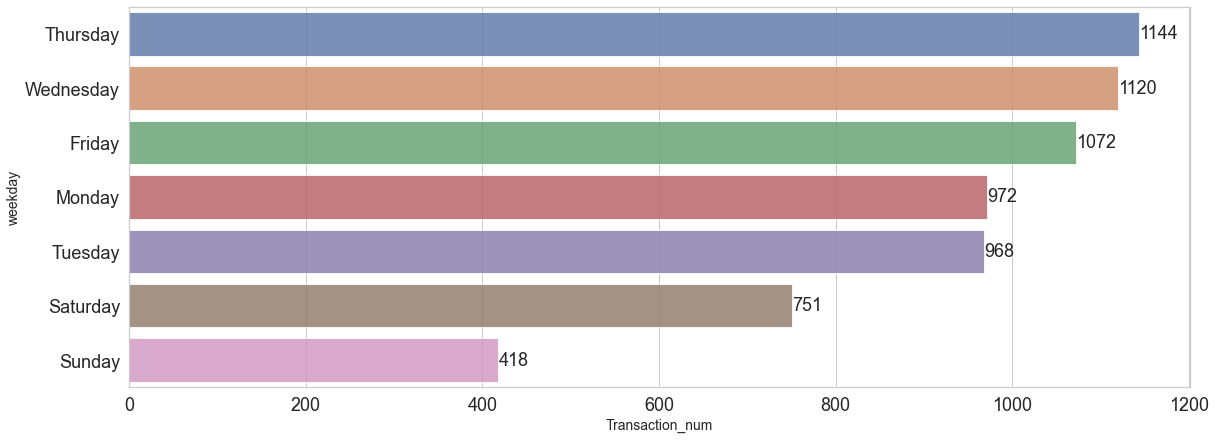

In [48]:
weekday_sale_num = df.groupby('weekday').count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)

sn.barplot(x='Transaction_num', y='weekday', data=weekday_sale_num, alpha = 0.8)

for a, b in enumerate(weekday_sale_num.Transaction_num):
    plt.text(b, a, b, va='center')

В среду и четверг люди оказывается голоднее, чем в другие дни недели

Прибыльность по неделям

<AxesSubplot:xlabel='weekday', ylabel='MPrice'>

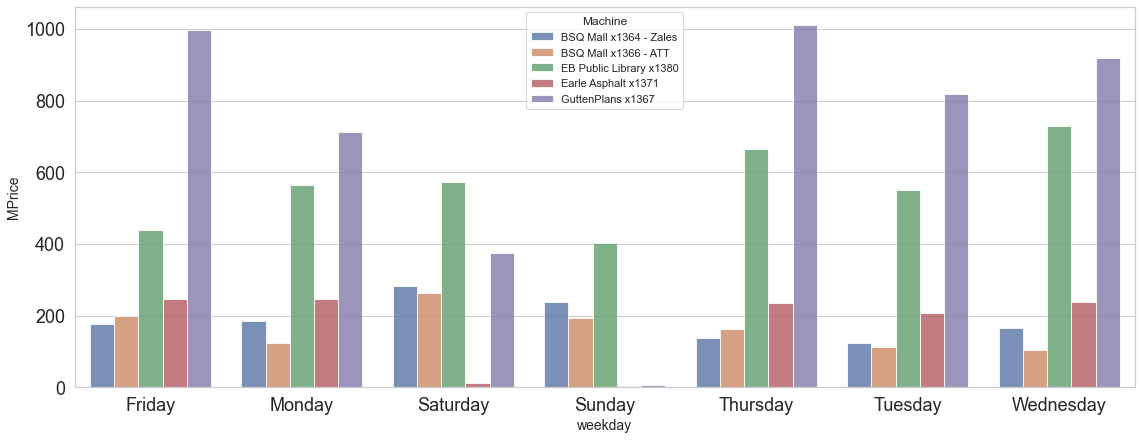

In [49]:
weekday_sale_num = df.groupby(['weekday','Machine']).sum()['MPrice'].reset_index()
sn.barplot(data = weekday_sale_num, x = 'weekday', y='MPrice', hue='Machine',  ci=False, alpha = 0.8)


По воскресеньям пользуются автоматами больше всего посетители библиотеки, однако и в другие дни у библиотеки показатели высокие. Объем потребления снеков в офисе Earle Asphalt на 3 месте, после завода и библиотеки, так же в офисе не прочь перекусить и по субботам, но это скорее исключение. Обьем спроса на заводе GuttenPlans значительно обходит по величине другие локации, скорее всего численность персонала значительно больше, хотя может их провоцирует на постоянные перекусы продукт, который они производят (завод по производству замороженного теста и его производных). Самые низкие показатели у автоматов в торговом центре, хотя по выходным спрос на снеки незначительно вырастает. Возможно автоматы стоят в неподходящем месте и достаточно их попробовать переставить

Построим график доходности для каждого автомата по месяцам

<AxesSubplot:xlabel='Machine', ylabel='MPrice'>

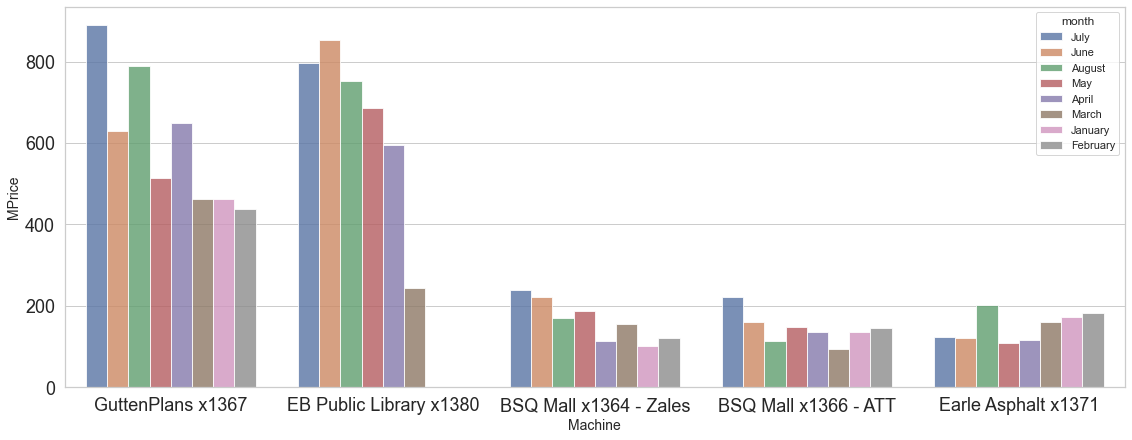

In [50]:
month_sale_sum = df.groupby(['month', 'Machine']).agg({'MPrice': 'sum'}).reset_index().sort_values('MPrice', ascending=False)
month_sale_sum
sn.barplot(data = month_sale_sum, x = 'Machine', y='MPrice', hue='month', ci=False, alpha = 0.8)

На заводе прямо заявляют - Июль - время перекусов! (или просто жара и работников мучает жажда), так же как и в библиотеке в летние месяцы спрос выше. Посмотрим что покупали в июле работники GuttenPlans

In [51]:
df.loc['2022-07-01':'2022-07-31'].query('Location == "GuttenPlans"').groupby(['Location', 'Product']).sum().sort_values('MPrice')

Transaction  RCoil  \
Location    Product                                                       
GuttenPlans Cheetos Puffs                            15346792825    120   
            Nutri Grain Apple Cinnamon               61520144209    540   
            Doritos Famin Hot Nacho                  61761391711    452   
            Jack Links Beef Steak Original           61603677355    556   
            Cheetos Cheddar Jalapeno                 76775248954    620   
            Fritos - Original                        77063406826    625   
            Doritos Spicy Nacho                      92114434870    678   
            Ruffles Baked  - Cheddar & Sour Cream   107770690332    861   
            Cheetos - Crunchy                       123263992169    992   
            Cheetos Flaming Hot Limon Crunchy        92129196547    672   
            Lays - Classic                          169532250294   1257   
            Doritos Cool Ranch                      185058659188   1440   
            Doritos Nacho Cheese                    215701115964   1694   
            Nature's Bakery Fig Bar - Raspberry     246346452130   2080   
            Nature's Bakery Fig Bar - Blueberry     246290668279   2112   
            Cheetos - Fleming Hot Crunchy           215392013498   1636   
            Funyuns - Flaming Hot                   261464164286   1912   
            Chesters Fries Flaming hot              246269324507   1788   
            Snapple Tea - Raspberry                 215404157262   2050   
            Snapple Tea - Lemon                     276850471457   2580   
            Sunkist Soda - Orange                   538894572732   4900   
            Snapple Tea - Peach                     354014858705   3349   
            Red Bull - Original                     323528178233   3108   
            KitKat - Crisp Wafers                   538357505549   4796   
            Coca Cola - Regular                    1169765307782  10754   
            Monster Energy Original                 831276364379   7834   

                                                   RPrice  RQty  MCoil  \
Location    Product                                                      
GuttenPlans Cheetos Puffs                             1.5     1    120   
            Nutri Grain Apple Cinnamon                6.0     4    540   
            Doritos Famin Hot Nacho                   6.0     4    452   
            Jack Links Beef Steak Original            6.0     4    556   
            Cheetos Cheddar Jalapeno                  7.5     5    620   
            Fritos - Original                         7.5     5    625   
            Doritos Spicy Nacho                       9.0     6    678   
            Ruffles Baked  - Cheddar & Sour Cream    10.5     8    861   
            Cheetos - Crunchy                        12.0     8    992   
            Cheetos Flaming Hot Limon Crunchy        12.0     6    672   
            Lays - Classic                           16.5    11   1257   
            Doritos Cool Ranch                       18.0    13   1440   
            Doritos Nacho Cheese                     21.0    14   1694   
            Nature's Bakery Fig Bar - Raspberry      24.0    18   2080   
            Nature's Bakery Fig Bar - Blueberry      24.0    17   2112   
            Cheetos - Fleming Hot Crunchy            25.5    14   1636   
            Funyuns - Flaming Hot                    27.5    17   1912   
            Chesters Fries Flaming hot               28.5    16   1788   
            Snapple Tea - Raspberry                  35.0    14   2050   
            Snapple Tea - Lemon                      45.0    18   2580   
            Sunkist Soda - Orange                    52.5    35   4900   
            Snapple Tea - Peach                      57.5    23   3349   
            Red Bull - Original                      73.5    21   3108   
            KitKat - Crisp Wafers                    87.5    36   4796   
            Coca Cola - Regu

In [ ]:
df.loc['2022-07-01':'2022-07-31'].query('Location == "GuttenPlans"').groupby(['Location', 'Product']).sum().sort_values('MPrice')

Cамые актуальные товары на заводе в июле - это напитки - энергетик Monster Energy Original и Coca Cola - Regular (с сахаром!)

<AxesSubplot:xlabel='month', ylabel='MPrice'>

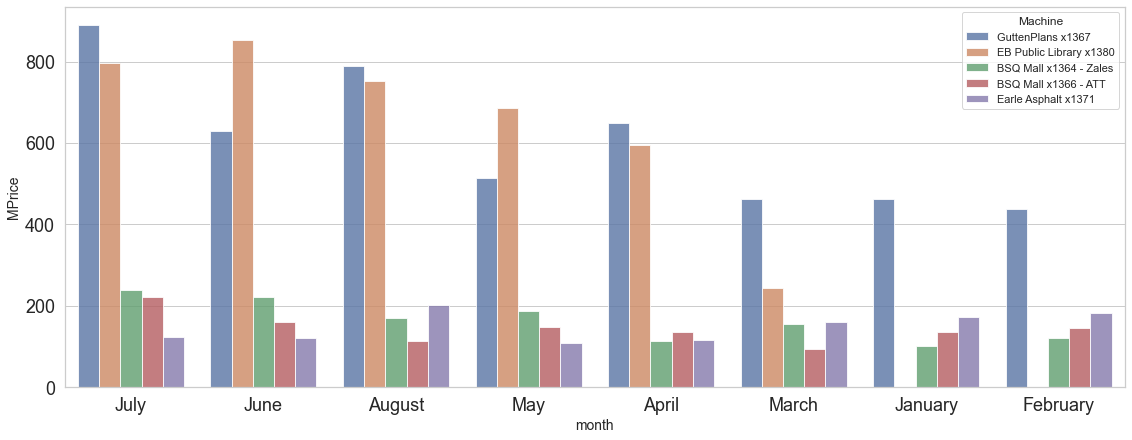

In [52]:
sn.barplot(data = month_sale_sum, x = 'month', y='MPrice', hue='Machine', ci=False, alpha = 0.8)

По графику видно, что в январе и феврале в библиотеке не было продаж совсем, так как автомат заработал только в конце марта. Зато в мае и июне автомат в библиотеке обошел даже автомат расположенный на заводе

Попробуем узнать какие снеки чаще всего покупают в разных локациях

In [194]:
location_product_num = df.groupby(['Location', 'Product']).count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)
location_product_num

,Location,Product,Transaction_num
268,GuttenPlans,Monster Energy Original,307
249,GuttenPlans,Coca Cola - Zero Sugar,280
307,GuttenPlans,Sunkist Soda - Orange,217
261,GuttenPlans,KitKat - Crisp Wafers,181
55,Brunswick Sq Mall,Poland Springs Water,173
...,...,...,...
48,Brunswick Sq Mall,Nature's Garden Trail Mix - Omega 3,1
47,Brunswick Sq Mall,Nature's Garden Trail Mix - Heart Healthy Mix,1
37,Brunswick Sq Mall,Larabar - Peanut Butter chocolate Chip,1
34,Brunswick Sq Mall,Keto Krisp - Almond/Chocolate,1


Узнаем, стабильный ли спрос на заводе на энергетик по месяцам

In [88]:
df.query('Location == "GuttenPlans" & Product == "Monster Energy Original"').groupby('month').agg({'MQty':'count'})

,MQty
month,
April,51
August,49
February,31
January,27
July,54
June,38
March,37
May,20


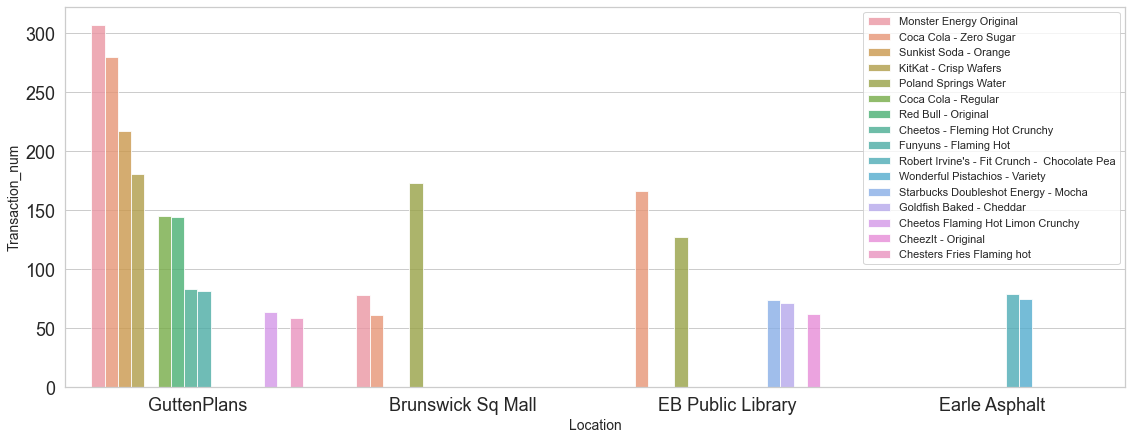

In [195]:
sn.barplot(y='Transaction_num', x='Location', hue='Product', data=location_product_num.head(20), alpha = 0.8)
plt.legend(loc = 'upper right')

На заводе любят сладкие бодрящие напитки, а в офисе - вкусняшки, в библиотеке и торговом центре людям больше всего хочется пить чистой негазированной воды. Очевидно надо проверить хватает ли этих продуктов в локациях и если нет, то их объем нужно увеличить. С другой стороны, в этих местах покупают именно эти продукты больше всего, потому что ассортимент распологает. Надо пробовать заменить ассортимент на другие популярные продукты, либо ставить дополнительные автоматы с новыми продуктами.

Теперь посмотрим в каком ценовом диапазоне чаще всего берут снеки

<AxesSubplot:xlabel='MPrice', ylabel='Transaction_num'>

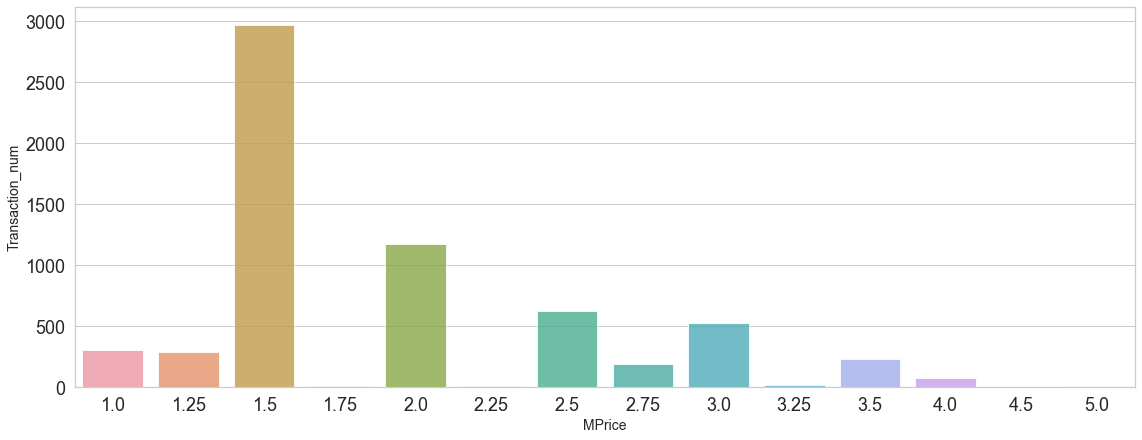

In [117]:
most_freq_product = df.groupby('MPrice').count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False).head(20)
sn.barplot(data = most_freq_product, y = 'Transaction_num', x='MPrice', ci=False, alpha = 0.8 )

За 8 месяцев почти никто не купил снек за 5 долларов, зато 3000 раз купили снеки за 1.5 доллара, за 2 доллара чуть больше 1000 раз, значит в автоматах большая часть снеков должна быть за такую стоимость

Уточним частоту в ценовом диапазоне по локациям

<AxesSubplot:xlabel='MPrice', ylabel='Transaction_num'>

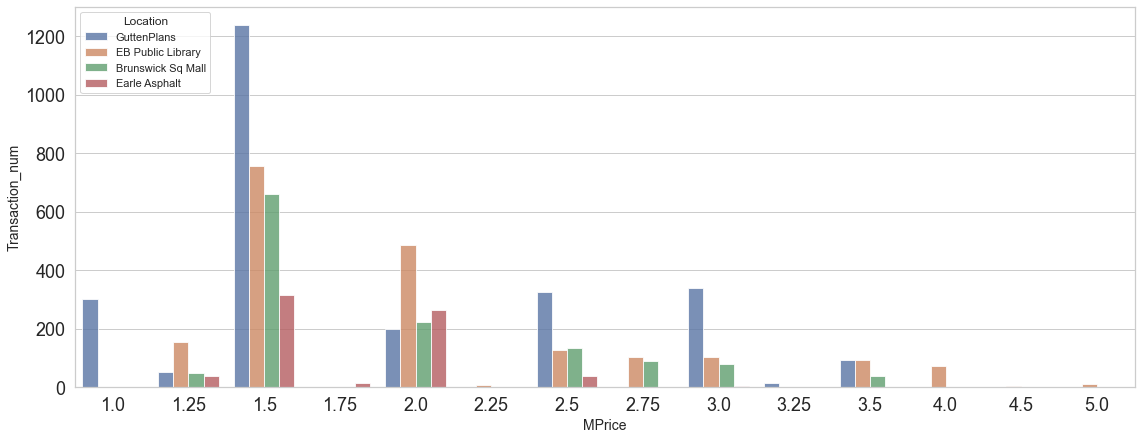

In [198]:
location_most_freq_product = df.groupby(['MPrice', 'Location']).count()['Transaction'].reset_index().rename(columns={
    'Transaction': 'Transaction_num'}).sort_values('Transaction_num', ascending=False)
sn.barplot(data = location_most_freq_product, y = 'Transaction_num', x='MPrice', hue='Location', ci=False, alpha = 0.8 )

На заводе чаще покупают за 1.5 доллара, но есть и за 3 - это их любимый Monster Energy, в библиотеке  и торговом центре так же преобладает 1.5 доллара. В офисе позволяют себе снеки в основном за 1.5 и 2 доллара 

# Заключение

Похоже, что вендинговый бизнес набирает обороты, так за 8 месяцев c января по август прибыль увеличилась почти в 2.5 раза, с 7% до 18%, в отдельности можно выделить автомат на заводе - 39% от общего дохода, и в библиотеке - 32%, резкие подъемы продаж в апреле и в июле с закрепленным результатом в виде плато. 
В торговом центре продажи идут не очень хорошо, по сравнению с другими автоматами, возможно дело в проходимости.
В среднем люди берут снеки в ценовом диапазоне 1.5 - 2 доллара, но в каждой локации есть свои предпочтения и их надо учитывать.
рекомендации:
 - Цены должны быть у большинства снеков в пределах 1.5-2 долларов (за исключением предпочтимых продуктов в локациях)
 - В торговом центре попробвать поменять расположение атоматов или поменять ассортимент
 - на заводе и в библиотеке провести ревизию остатков и поставить дополнительный автомат с новыми продуктами и с достаточным объемом продутков наиболее актуальный на заводе  (Monster Energy, Coca-Cola и Kit-kat на заводе и Water spring в библиотеке)
 - Оценить сезонность летом (берут ли чаще воду и тд.)
 
С другой стороны, в этих местах покупают именно эти продукты больше всего, потому что ассортимент распологает. Надо пробовать заменить ассортимент на другие популярные продукты, либо ставить дополнительные автоматы с новыми продуктами.